In [19]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

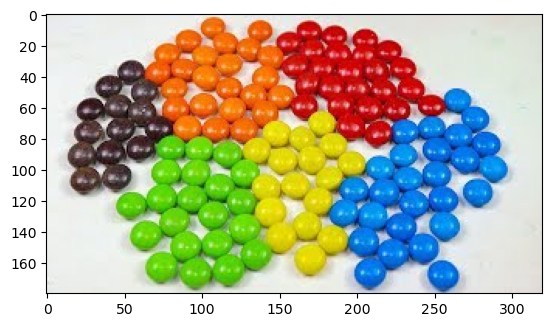

In [20]:
base_path = r"C:\Users\Gebruiker\OneDrive - Hanzehogeschool Groningen\Minor\minor IA\CVIP2024\CVIP_Lecture_3\images\smarties"

file_list = [
    base_path + "1.jpeg",
    base_path + "2.jpeg",
    base_path + "3.png",
    base_path + "4.jpeg",
    base_path + "5.jpeg",
    base_path + "6.jpeg",
    base_path + "7.png"
]

n = 1 # Change this value to select a different image from the list and image setting

# Read the image
image = cv2.imread(file_list[n])
image2 = image[:,:,::-1]
plt.imshow(image2)

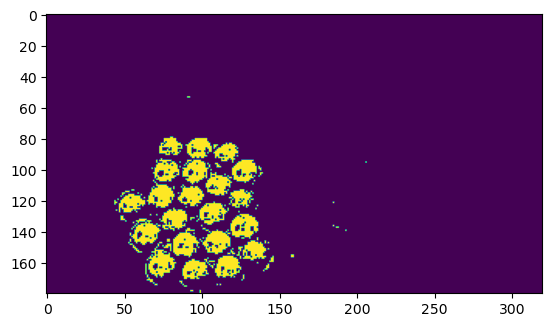

In [21]:
# To HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSV range for the upper and lower green
lower_green = [(50, 40, 150), (35, 40, 200), (50, 120, 50), (50, 65, 150), (50, 40, 180), (50, 50, 100), (33, 100, 35)]
upper_green = [(70, 255, 255), (70, 255, 230), (70, 255, 255) ,(75, 245, 255), (70, 255, 230), (85, 255, 255), (90, 255, 230)]

# Threshold the HSV image to get only green colors
mask = cv2.inRange(hsv, lower_green[n], upper_green[n])
plt.imshow(mask)

In [22]:
# Find contours in the mask
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area
min_area = 50  # minimum area to be considered as a valid contour
valid_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

# Draw contours on the original image (for visualization)
cv2.drawContours(image, valid_contours, -1, (0, 255, 0), 1)

# Count the number of green M&M candies
green_mm_count = len(valid_contours)
print("Number of green M&M candies:", green_mm_count)

Number of green M&M candies: 21


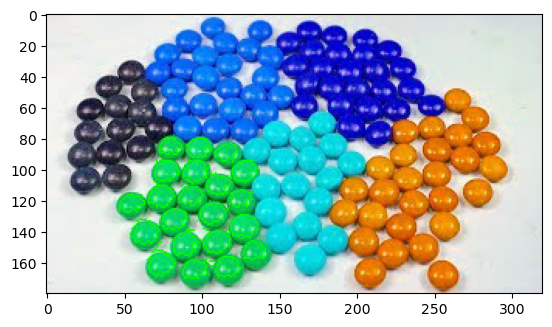

In [25]:
# Display the image with contours
plt.imshow(image)